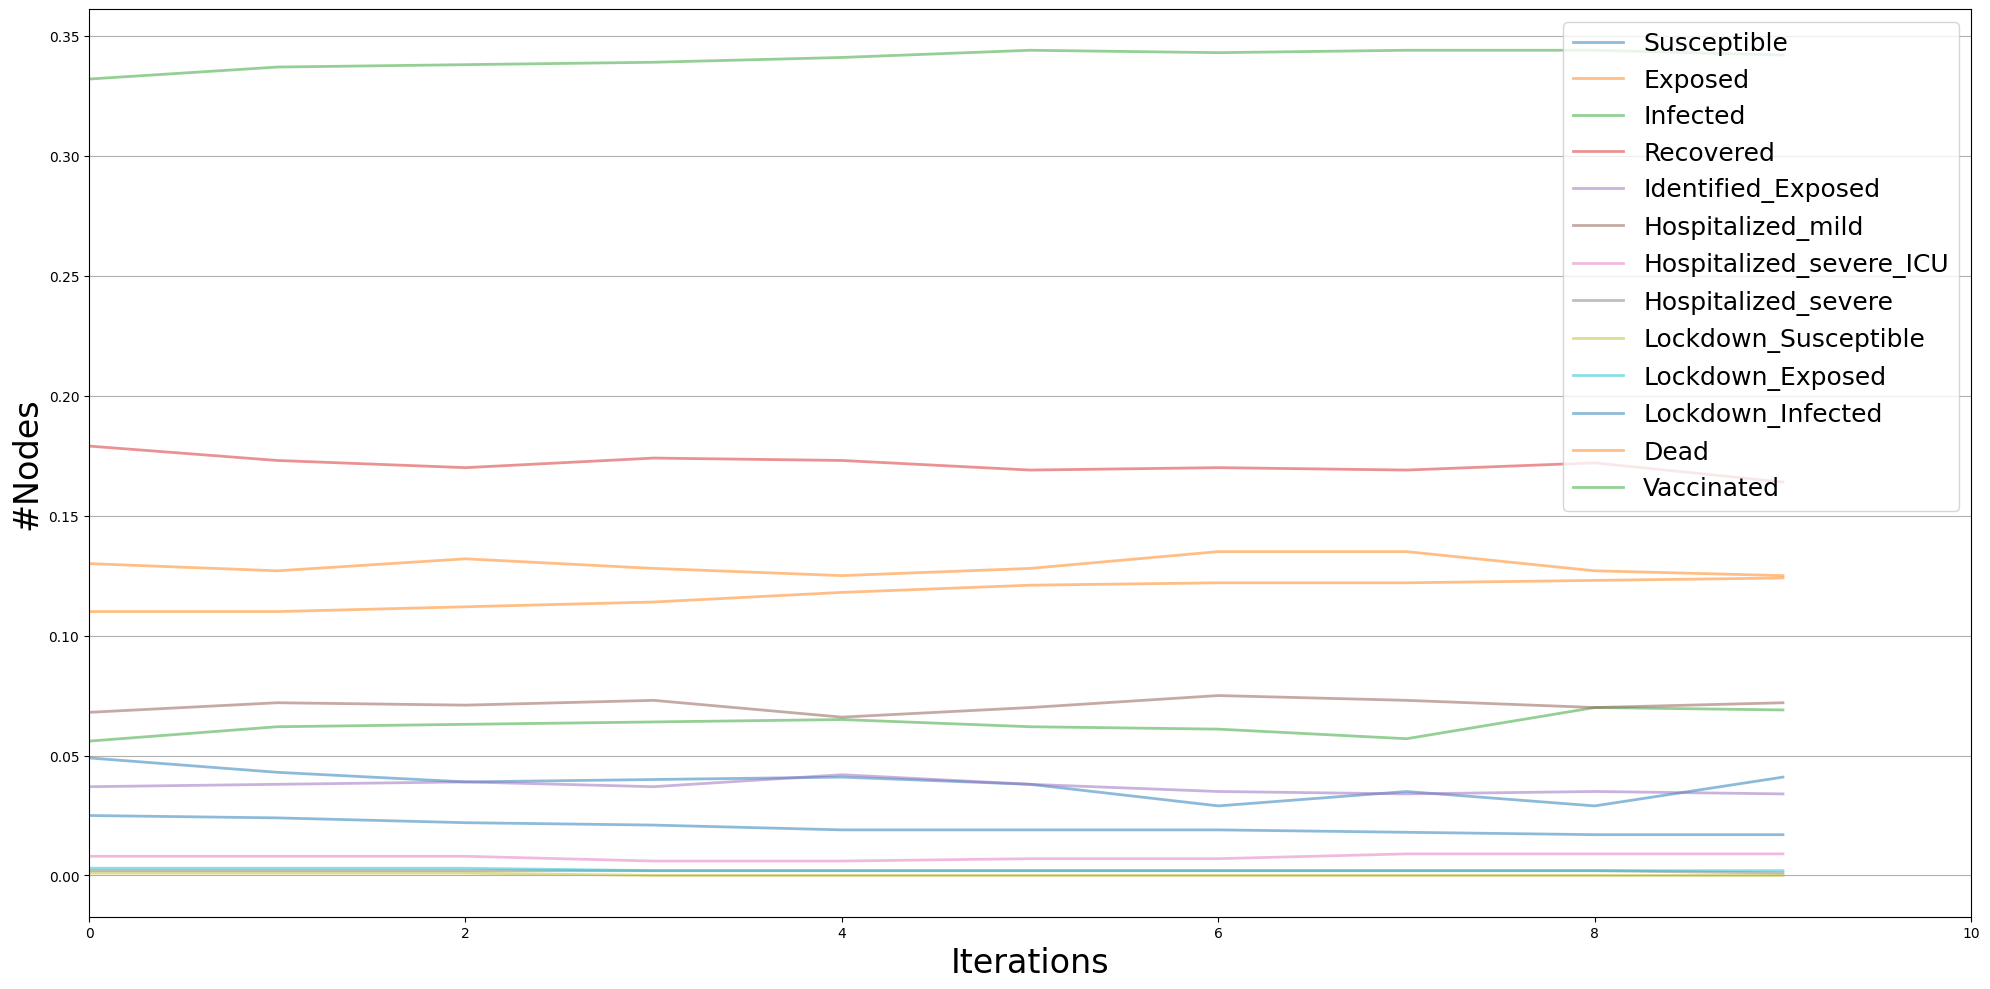

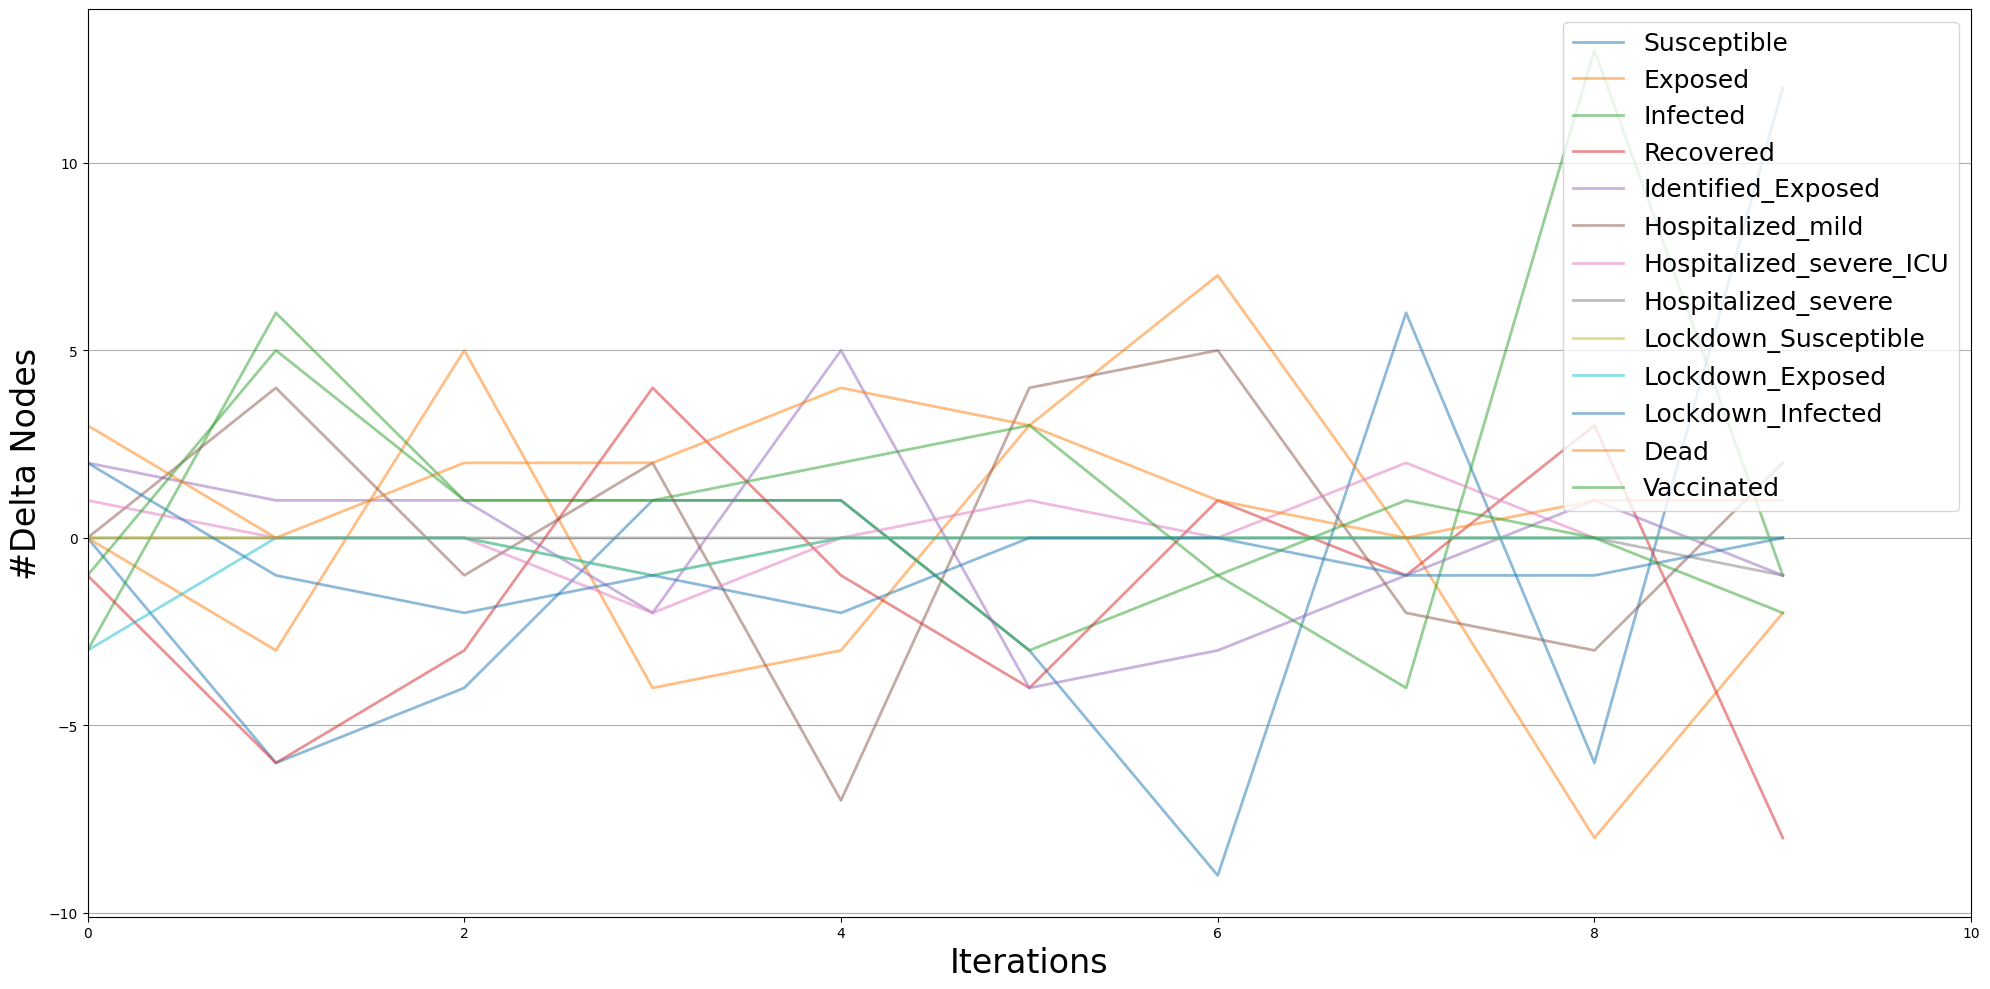

In [3]:
'''
https://ndlib.readthedocs.io/en/latest/reference/models/epidemics/UTLDR.html
'''


import networkx as nx
import numpy as np
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

model = epd.UTLDRModel(g)
config = mc.Configuration()

# Undetected
config.add_model_parameter("sigma", 0.05)
config.add_model_parameter("beta", {"M": 0.25, "F": 0})
config.add_model_parameter("gamma", 0.05)
config.add_model_parameter("omega", 0.01)
config.add_model_parameter("p", 0.04)
config.add_model_parameter("lsize", 0.2)

# Testing
config.add_model_parameter("phi_e", 0.03)
config.add_model_parameter("phi_i", 0.1)
config.add_model_parameter("kappa_e", 0.03)
config.add_model_parameter("kappa_i", 0.1)
config.add_model_parameter("gamma_t", 0.08)
config.add_model_parameter("gamma_f", 0.1)
config.add_model_parameter("omega_t", 0.01)
config.add_model_parameter("omega_f", 0.08)
config.add_model_parameter("epsilon_e", 1)
config.add_model_parameter("icu_b", 10)
config.add_model_parameter("iota", 0.20)
config.add_model_parameter("z", 0.2)
config.add_model_parameter("s", 0.05)

# Lockdown
config.add_model_parameter("lambda", 0.8)
config.add_model_parameter("epsilon_l", 5)
config.add_model_parameter("mu", 0.05)
config.add_model_parameter("p_l", 0.04)

# Vaccination
config.add_model_parameter("v", 0.15)
config.add_model_parameter("f", 0.02)

config.add_model_parameter('fraction_infected', 0.4)

nodes = g.nodes
ngender = ['M', 'F']
work = ['school', 'PA', 'hospital', 'none']
for i in nodes:
    config.add_node_configuration("activity", i, 1)
    config.add_node_configuration("work", i, np.random.choice(work, 2))
    config.add_node_configuration("segment", i, np.random.choice(ngender, 1)[0])

model.set_initial_status(config)
iterations = model.iteration_bunch(10)

households = {0: [1, 2, 3, 4], 5: [6, 7]}
model.set_lockdown(households, ['PA', 'school'])
iterations = model.iteration_bunch(10)

model.unset_lockdown(['PA'])
iterations = model.iteration_bunch(10)

model.set_lockdown(households)
iterations = model.iteration_bunch(10)

model.unset_lockdown(['school'])
iterations = model.iteration_bunch(10)

model.add_ICU_beds(5)
iterations = model.iteration_bunch(10)

trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()

